In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Calculating value of "n_components" using explained variance for PCA

In [2]:
data = pd.read_pickle("D:\\TIL NLP Projec Files\\Word Embeddings\\em1.pkl")
data

,tokens,embeddings,target
0,"[new, delhi, andhra, pradesh, public, service,...","[[[-0.24230754, 0.6758959, -3.0359886, 0.14046...",academic interests
1,"[pune, two, week, new, academic, year, begin, ...","[[[-0.37797007, 0.33381104, -3.0789416, -0.120...",academic interests
2,"[guwahati, result, cbse, class, x, exam, annou...","[[[-0.64431006, 0.20074141, -3.523524, 0.31455...",academic interests
3,"[admission, iims, say, kapoor, across, iims, s...","[[[-1.1897714, -0.17914984, -4.576548, -0.4710...",academic interests
4,"[mangaluru, mangalore, institute, technology, ...","[[[-0.16192678, 0.8034336, -3.237337, 0.577428...",academic interests
...,...,...,...
19979,"[odisha, th, result, board, secondary, educati...","[[[-0.7888885, 0.7269752, -3.3675919, -0.01822...",academic interests
19980,"[fund, federal, government, programme, urge, b...","[[[-0.9928848, 0.5346526, -3.8557582, 0.059418...",academic interests
19981,"[pune, student, appear, secondary, school, cer...","[[[-0.8052787, 0.2641247, -3.278021, -0.630721...",academic interests
19982,"[new, delhi, past, two, day, see, surge, onlin...","[[[-0.5997653, 0.19085337, -3.123851, 0.028076...",academic interests


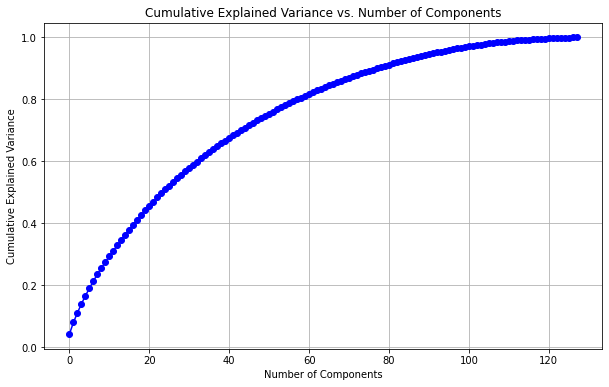

Number of components to retain 95.0% variance: 93


In [3]:
data = pd.read_pickle("D:\\TIL NLP Projec Files\\Word Embeddings\\em1.pkl")
embeddings = data['embeddings'].apply(lambda x: x[0])

pca = PCA()

pca.fit(np.vstack(embeddings))

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

desired_variance = 0.95
n_components = np.argmax(cumulative_explained_variance >= desired_variance) + 1

print(f"Number of components to retain {desired_variance * 100}% variance: {n_components}")

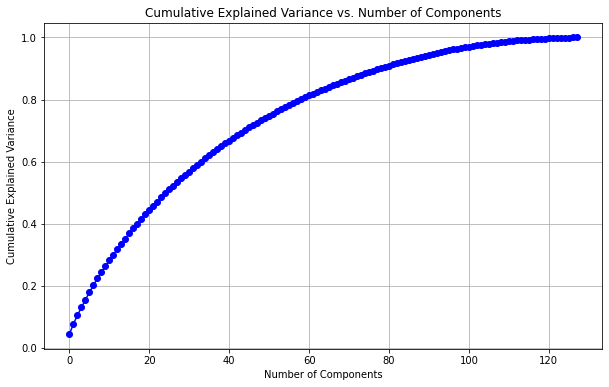

Number of components to retain 99.0% variance: 113


In [7]:
data = pd.read_pickle("D:\\TIL NLP Projec Files\\Word Embeddings\\em2.pkl")
embeddings = data['embeddings'].apply(lambda x: x[0])

pca = PCA()

pca.fit(np.vstack(embeddings))

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

desired_variance = 0.99
n_components = np.argmax(cumulative_explained_variance >= desired_variance) + 1

print(f"Number of components to retain {desired_variance * 100}% variance: {n_components}")

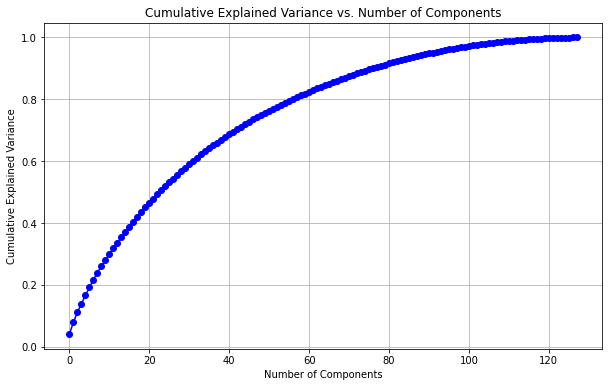

Number of components to retain 99.0% variance: 113


In [2]:
data = pd.read_pickle("D:\\TIL NLP Projec Files\\Word Embeddings\\em3.pkl")
embeddings = data['embeddings'].apply(lambda x: x[0])

pca = PCA()

pca.fit(np.vstack(embeddings))

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

desired_variance = 0.99
n_components = np.argmax(cumulative_explained_variance >= desired_variance) + 1

print(f"Number of components to retain {desired_variance * 100}% variance: {n_components}")

## Applying PCA for dimensional reduction

In [2]:
pca = PCA(0.9)
scaler = StandardScaler()

def apply_pca(embeddings):
    embedding = embeddings[0]

    scaled_embedding = scaler.fit_transform(embedding)
    reduced_embedding = pca.fit_transform(scaled_embedding)
    return reduced_embedding

In [3]:
def reduce(inp):
    return np.mean(inp, axis=0)

In [4]:
df = pd.read_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\em1.pkl')
df['reduced_embeddings'] = df['embeddings'].apply(apply_pca)
df['embeddings'] = df.reduced_embeddings.apply(reduce)
df

,tokens,embeddings,target,reduced_embeddings
0,"[new, delhi, andhra, pradesh, public, service,...","[2.461095e-07, 4.101825e-08, 7.690922e-09, 0.0...",academic interests,"[[1.6840361, 0.5004986, 0.9415991, -3.1031046,..."
1,"[pune, two, week, new, academic, year, begin, ...","[-9.419006e-08, -4.709503e-08, -7.064254e-08, ...",academic interests,"[[-3.2900531, -1.683758, 1.8779658, -0.8032455..."
2,"[guwahati, result, cbse, class, x, exam, annou...","[-1.06854266e-07, -4.2741707e-08, 8.5483414e-0...",academic interests,"[[-2.3229446, -0.13500763, 0.95145935, 0.04231..."
3,"[admission, iims, say, kapoor, across, iims, s...","[2.5675847e-08, -1.2471126e-07, -1.0270339e-07...",academic interests,"[[-1.0890921, 0.7943755, 0.79980737, 1.7566881..."
4,"[mangaluru, mangalore, institute, technology, ...","[2.9119827e-08, 2.9119827e-08, -2.9119827e-08,...",academic interests,"[[-3.0648308, -1.3563002, 1.5900898, 1.3295492..."
...,...,...,...,...
19979,"[odisha, th, result, board, secondary, educati...","[-4.4100545e-08, 8.820109e-08, 0.0, -6.615082e...",academic interests,"[[-2.0702696, -0.4297701, 2.0772135, -2.593678..."
19980,"[fund, federal, government, programme, urge, b...","[2.5587852e-08, -1.2041342e-07, -1.9687594e-07...",academic interests,"[[-3.7287133, -1.5862699, -1.2721328, -3.04101..."
19981,"[pune, student, appear, secondary, school, cer...","[-2.1036934e-07, -9.116005e-08, -9.3614354e-08...",academic interests,"[[-3.6188486, -1.3335744, -2.569558, -2.709362..."
19982,"[new, delhi, past, two, day, see, surge, onlin...","[3.8146972e-08, 8.719308e-08, 0.0, -4.359654e-...",academic interests,"[[-2.9657247, -4.2177367, 1.0526677, 2.0409064..."


In [5]:
dx = df.drop('reduced_embeddings', axis = 1)

In [6]:
dx

,tokens,embeddings,target
0,"[new, delhi, andhra, pradesh, public, service,...","[2.461095e-07, 4.101825e-08, 7.690922e-09, 0.0...",academic interests
1,"[pune, two, week, new, academic, year, begin, ...","[-9.419006e-08, -4.709503e-08, -7.064254e-08, ...",academic interests
2,"[guwahati, result, cbse, class, x, exam, annou...","[-1.06854266e-07, -4.2741707e-08, 8.5483414e-0...",academic interests
3,"[admission, iims, say, kapoor, across, iims, s...","[2.5675847e-08, -1.2471126e-07, -1.0270339e-07...",academic interests
4,"[mangaluru, mangalore, institute, technology, ...","[2.9119827e-08, 2.9119827e-08, -2.9119827e-08,...",academic interests
...,...,...,...
19979,"[odisha, th, result, board, secondary, educati...","[-4.4100545e-08, 8.820109e-08, 0.0, -6.615082e...",academic interests
19980,"[fund, federal, government, programme, urge, b...","[2.5587852e-08, -1.2041342e-07, -1.9687594e-07...",academic interests
19981,"[pune, student, appear, secondary, school, cer...","[-2.1036934e-07, -9.116005e-08, -9.3614354e-08...",academic interests
19982,"[new, delhi, past, two, day, see, surge, onlin...","[3.8146972e-08, 8.719308e-08, 0.0, -4.359654e-...",academic interests


In [8]:
dx.iloc[17026].embeddings.shape

(55,)

In [9]:
dx.to_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\embed1.pkl')

In [3]:
dx = pd.read_pickle('embed1.pkl')
# x = dx.iloc[5670].reduced_embeddings
# x = x.reshape(-1)
# x.tolist()

## Conclusion: Even embeddings after reduced dimensions using PCA (variance = 90%) has a file size of almost 950 Mb - 1 Gb.

### Solution: We will use mean aggregation to reduce the shape significantly.

In [10]:
df2 = pd.read_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\em2.pkl')
df2['reduced_embeddings'] = df2['embeddings'].apply(apply_pca)
df2['embeddings'] = df2.reduced_embeddings.apply(reduce)
df2 = df2.drop('reduced_embeddings', axis = 1)
df2

,tokens,embeddings,target
0,"[japan, foundation, travel, exhibition, title,...","[0.0, 0.0, -4.68061e-08, 0.0, 0.0, 0.0, -4.680...",arts and culture
1,"[first, come, kolkata, school, believe, city, ...","[0.0, 2.8681935e-08, 5.3778628e-08, 2.151145e-...",arts and culture
2,"[filmmaker, vivek, agnihotri, saturday, tell, ...","[0.0, 0.0, -1.2371991e-07, 6.185996e-08, 0.0, ...",arts and culture
3,"[mangaluru, mangalore, university, award, phd,...","[0.0, -4.5144347e-08, 0.0, -2.2572173e-08, 5.0...",arts and culture
4,"[graphic, novelist, abhijeet, kini, give, read...","[0.0, -5.4495676e-08, -8.719308e-08, 7.084438e...",arts and culture
...,...,...,...
19928,"[chandigarh, theme, tribe, india, fourth, edit...","[-1.0240798e-07, 5.120399e-08, -1.2800997e-07,...",arts and culture
19929,"[pune, air, force, station, afs, lohegaon, dis...","[7.064254e-08, 0.0, 4.4151587e-08, -2.2075794e...",arts and culture
19930,"[filmmaker, mahesh, bhatt, confirm, adult, fil...","[3.1526422e-08, -6.3052845e-08, 1.5763211e-08,...",arts and culture
19931,"[hour, half, long, wait, gate, finally, open, ...","[4.0798902e-08, 1.223967e-07, -2.0399451e-08, ...",arts and culture


In [11]:
df2.to_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\embed2.pkl')

In [14]:
df3 = pd.read_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\em3.pkl')
df3['reduced_embeddings'] = df3['embeddings'].apply(apply_pca)
df3['embeddings'] = df3.reduced_embeddings.apply(reduce)
df3 = df3.drop('reduced_embeddings', axis = 1)
df3.to_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\embed3.pkl')
df3

,tokens,embeddings,target
0,"[november, pv, sale, november, top, pv, sale, ...","[2.2114187e-07, 0.0, 2.7642734e-08, 0.0, -1.38...",automotives
1,"[visteon, ecarx, jointly, support, lead, inveh...","[0.0, 0.0, -7.246055e-08, 2.8049245e-08, 2.337...",automotives
2,"[well, ajay, singh, run, state, bank, india, k...","[0.0, 6.1776475e-08, 5.695019e-08, 7.722059e-0...",automotives
3,"[live, northeastern, united, state, must, snow...","[1.6212464e-07, -6.9936114e-08, 4.529953e-08, ...",automotives
4,"[gefco, would, allow, cma, cgms, logistics, di...","[0.0, -2.1370854e-08, 0.0, 0.0, 0.0, 2.1370854...",automotives
...,...,...,...
19947,"[technologically, car, come, long, way, past, ...","[-8.729285e-08, -6.983427e-08, 0.0, 3.4917136e...",automotives
19948,"[ticgard, kepong, professional, window, tint, ...","[0.0, -5.488773e-08, -5.488773e-08, 0.0, -2.74...",automotives
19949,"[recent, spike, covid, case, impact, operation...","[6.3844304e-08, -6.3844304e-08, -9.576646e-08,...",automotives
19950,"[auto, market, reel, costofliving, squeeze, br...","[0.0, -2.3767583e-08, 4.7535167e-08, -2.376758...",automotives


In [15]:
df4 = pd.read_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\em4.pkl')
df4['reduced_embeddings'] = df4['embeddings'].apply(apply_pca)
df4['embeddings'] = df4.reduced_embeddings.apply(reduce)
df4 = df4.drop('reduced_embeddings', axis = 1)
df4.to_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\embed4.pkl')
df4

,tokens,embeddings,target
0,"[second, book, hidden, series, magnificent, fa...","[7.7686956e-08, -1.7948365e-07, -4.9893774e-08...",books and literature
1,"[gothgirl, raven, date, dream, boyfriend, comp...","[1.3486303e-07, -7.706459e-08, -1.8543668e-07,...",books and literature
2,"[bengaluru, former, bureaucrat, manu, baligar,...","[0.0, 0.0, 0.0, 6.1693214e-08, -7.711652e-09, ...",books and literature
3,"[volume, put, together, first, time, one, volu...","[1.4103634e-07, -5.372813e-08, 5.372813e-08, 2...",books and literature
4,"[director, randhir, ranjan, roycast, shekhar, ...","[1.5107712e-07, -5.035904e-08, 1.5107712e-07, ...",books and literature
...,...,...,...
19555,"[claire, river, race, mailbox, receive, letter...","[-8.8190546e-08, 6.690317e-08, 1.8489604e-07, ...",books and literature
19556,"[nearly, twenty, year, live, california, march...","[-2.846789e-08, 1.1387156e-07, 2.846789e-08, 8...",books and literature
19557,"[j, r, longawaited, novel, william, gaddi, aut...","[-2.1192763e-08, 4.2385526e-08, 4.2385526e-08,...",books and literature
19558,"[john, braines, remarkable, first, novel, room...","[1.538513e-07, 3.6679783e-08, 9.985052e-08, 1....",books and literature


In [16]:
df5 = pd.read_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\em5.pkl')
df5['reduced_embeddings'] = df5['embeddings'].apply(apply_pca)
df5['embeddings'] = df5.reduced_embeddings.apply(reduce)
df5 = df5.drop('reduced_embeddings', axis = 1)
df5.to_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\embed5.pkl')
df5

,tokens,embeddings,target
0,"[kolkata, state, cabinet, monday, give, approv...","[3.1013798e-08, 1.5506899e-07, -1.2405519e-07,...",business and finance
1,"[bangalore, microfinance, institution, mfis, f...","[-5.3166513e-08, 0.0, 5.3166513e-08, -7.974977...",business and finance
2,"[new, delhi, three, month, rollout, new, indir...","[8.645206e-08, 2.1613015e-08, -7.564555e-08, 0...",business and finance
3,"[new, delhi, apr, concern, recent, case, highi...","[-2.4067491e-08, 9.6269964e-08, 1.0830371e-07,...",business and finance
4,"[tweens, spend, report, billion, money, year, ...","[-1.0614526e-07, 1.5758488e-07, 3.1027076e-07,...",business and finance
...,...,...,...
19899,"[possible, go, event, learn, attendance, way, ...","[9.411259e-09, -2.3841858e-07, -1.160722e-07, ...",business and finance
19900,"[kolkata, niti, aayog, order, detailed, evalua...","[-2.4143654e-08, 0.0, 0.0, 7.8466876e-08, 0.0,...",business and finance
19901,"[div, classsectiondiv, classnormalthe, institu...","[3.1526422e-08, -3.1526422e-08, -9.457927e-08,...",business and finance
19902,"[keep, lowdenomination, currency, circulation,...","[8.989553e-08, 3.5237584e-08, -1.4168317e-08, ...",business and finance


In [17]:
df6 = pd.read_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\em6.pkl')
df6['reduced_embeddings'] = df6['embeddings'].apply(apply_pca)
df6['embeddings'] = df6.reduced_embeddings.apply(reduce)
df6 = df6.drop('reduced_embeddings', axis = 1)
df6.to_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\embed6.pkl')
df6

,tokens,embeddings,target
0,"[job, title, business, administrator, hour, mo...","[-1.6666154e-07, 1.0271674e-08, 1.0532083e-07,...",careers
1,"[engineer, new, career, lead, blue, chip, expe...","[0.0, 5.1724708e-08, -1.6163971e-08, 0.0, -5.1...",careers
2,"[commis, chef, exclusive, contract, caterer, c...","[-1.4828473e-07, 7.5596134e-08, -6.396596e-08,...",careers
3,"[research, nurse, full, training, offer, becom...","[0.0, 4.45048e-08, 5.086263e-08, -3.8146972e-0...",careers
4,"[client, client, lead, high, street, restauran...","[-5.52785e-08, 1.4356388e-07, -1.7945485e-08, ...",careers
...,...,...,...
19766,"[harbour, jones, lead, independent, innovative...","[1.8412524e-07, 1.2038959e-07, -4.72116e-09, 1...",careers
19767,"[jr, data, scientist, share, find, similar, ca...","[0.0, -8.1816566e-08, 2.0454141e-08, 5.1135354...",careers
19768,"[client, look, lamp, development, system, engi...","[-2.5221138e-07, 1.2610569e-07, -9.457927e-08,...",careers
19769,"[customer, contact, centre, case, officer, lee...","[3.3316134e-08, -6.663227e-08, -3.3316134e-08,...",careers


In [18]:
df7 = pd.read_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\em7.pkl')
df7['reduced_embeddings'] = df7['embeddings'].apply(apply_pca)
df7['embeddings'] = df7.reduced_embeddings.apply(reduce)
df7 = df7.drop('reduced_embeddings', axis = 1)
df7.to_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\embed7.pkl')
df7

,tokens,embeddings,target
0,"[kannada, actress, aishwarya, salimath, ready,...","[-3.615827e-08, -3.615827e-08, -7.231654e-08, ...",family and relationships
1,"[new, delhi, delhi, commission, woman, dcw, mo...","[8.4536225e-08, 8.4536225e-08, -1.2680434e-07,...",family and relationships
2,"[mumbai, delhi, police, continue, record, stat...","[2.0183583e-08, 3.0275377e-08, -7.064254e-08, ...",family and relationships
3,"[nagpur, durupyog, play, noga, wasahat, indora...","[0.0, 0.0, 3.3462257e-08, 1.6731128e-08, 6.692...",family and relationships
4,"[chennai, police, find, body, yearold, homemak...","[-8.087697e-08, 2.6958991e-08, 0.0, 4.0438486e...",family and relationships
...,...,...,...
19835,"[britain, continue, hold, sign, similar, deala...","[0.0, 1.2355295e-07, 3.0888238e-08, -3.0888238...",family and relationships
19836,"[wendy, will, date, indian, man, learn, tough,...","[0.0, 0.0, -4.2701835e-08, -4.2701835e-08, 2.8...",family and relationships
19837,"[quite, year, rashmika, mandanna, college, stu...","[1.0206548e-07, -3.8274553e-08, 8.29282e-08, 5...",family and relationships
19838,"[pune, yearold, youth, arrest, thursday, day, ...","[1.4901161e-08, -7.4505806e-08, -7.450581e-09,...",family and relationships


In [19]:
df8 = pd.read_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\em8.pkl')
df8['reduced_embeddings'] = df8['embeddings'].apply(apply_pca)
df8['embeddings'] = df8.reduced_embeddings.apply(reduce)
df8 = df8.drop('reduced_embeddings', axis = 1)
df8.to_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\embed8.pkl')
df8

,tokens,embeddings,target
0,"[thane, hold, three, acre, fertile, agricultur...","[0.0, -1.1319576e-08, 9.62164e-08, -6.791746e-...",food and drinks
1,"[pune, doctor, notice, considerable, increase,...","[5.515225e-08, -7.813235e-08, -7.3536334e-08, ...",food and drinks
2,"[final, solution, destitute, home, recovery, h...","[8.0830134e-08, 4.1584634e-08, -2.4950781e-08,...",food and drinks
3,"[northwestern, turkey, city, canakkale, tragic...","[-9.973065e-08, 0.0, 0.0, 3.7398994e-08, 2.493...",food and drinks
4,"[yearsno, dance, seat, areasno, professional, ...","[6.219615e-08, -2.7642734e-08, -2.7642734e-08,...",food and drinks
...,...,...,...
19920,"[india, kisan, sangarsh, coordination, committ...","[-5.2256127e-08, 0.0, 0.0, -2.1229052e-08, -5....",food and drinks
19921,"[actress, shruti, haasan, last, see, telugu, f...","[-6.3052845e-08, -3.1526422e-08, -3.1526422e-0...",food and drinks
19922,"[skip, bouquet, petalladen, bubble, bath, put,...","[-1.0020491e-07, 1.07115596e-07, 0.0, 9.674957...",food and drinks
19923,"[night, march, first, felt, dryness, throat, m...","[9.812726e-08, 0.0, -9.812726e-08, -4.906363e-...",food and drinks


In [20]:
df9 = pd.read_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\em9.pkl')
df9['reduced_embeddings'] = df9['embeddings'].apply(apply_pca)
df9['embeddings'] = df9.reduced_embeddings.apply(reduce)
df9 = df9.drop('reduced_embeddings', axis = 1)
df9.to_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\embed9.pkl')
df9

,tokens,embeddings,target
0,"[nashik, maharashtra, university, health, scie...","[3.615827e-08, 0.0, 0.0, 3.615827e-08, -5.4237...",health
1,"[patna, second, wave, covid, pandemic, proving...","[7.3713956e-08, -5.528547e-08, 1.8428489e-08, ...",health
2,"[patna, chief, minister, nitish, kumar, thursd...","[-6.079199e-08, 0.0, 7.598999e-09, -7.598999e-...",health
3,"[chennai, containment, effort, intensify, acro...","[2.968636e-08, 0.0, 5.937272e-08, -8.905908e-0...",health
4,"[shimla, use, mask, glove, increase, manifold,...","[-1.3934967e-07, 6.967483e-08, -6.967483e-08, ...",health
...,...,...,...
19914,"[new, delhi, global, covid, case, surge, due, ...","[-1.0206548e-07, -5.103274e-08, 1.2758185e-08,...",health
19915,"[patna, third, phase, nationwide, covid, vacci...","[-8.322976e-08, 8.322976e-08, -8.322976e-08, -...",health
19916,"[chandigarh, march, record, almost, sixtime, s...","[2.1075676e-08, 1.05378376e-07, 7.3764866e-08,...",health
19917,"[four, month, age, group, complete, target, fi...","[-3.4679065e-08, 7.965348e-08, 1.12706964e-07,...",health


In [21]:
df10 = pd.read_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\em10.pkl')
df10['reduced_embeddings'] = df10['embeddings'].apply(apply_pca)
df10['embeddings'] = df10.reduced_embeddings.apply(reduce)
df10 = df10.drop('reduced_embeddings', axis = 1)
df10.to_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\embed10.pkl')
df10

,tokens,embeddings,target
0,"[underlie, medical, issue, like, vitamin, defi...","[7.097111e-08, 7.097111e-08, 5.3228334e-08, -7...",healthy living
1,"[stage, grief, mean, tell, feel, feel, exactly...","[3.2218728e-09, -4.510622e-08, -5.1549964e-08,...",healthy living
2,"[youre, among, always, experiment, western, fa...","[-9.596722e-08, 9.596722e-08, -9.596722e-08, 0...",healthy living
3,"[lucknow, equate, tobacco, weapon, mass, destr...","[-5.0924356e-08, 1.4814358e-07, -3.7035896e-08...",healthy living
4,"[criminal, investigation, underway, six, peopl...","[9.576646e-08, 3.1922152e-08, 9.576646e-08, -1...",healthy living
...,...,...,...
19852,"[ahmedabad, vinay, oza, call, change, engineer...","[0.0, -3.532127e-08, 1.7660636e-08, 0.0, -1.32...",healthy living
19853,"[introchances, one, first, place, turn, quick,...","[-9.986118e-08, 7.988895e-08, 7.988895e-08, -1...",healthy living
19854,"[key, manage, conflict, first, foremost, recog...","[3.8284523e-07, 9.169946e-09, 1.2532259e-07, -...",healthy living
19855,"[christmas, fever, get, everyone, infect, thus...","[-8.940697e-08, 0.0, 5.9604645e-08, 5.9604645e...",healthy living


In [4]:
df11 = pd.read_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\em11.pkl')
df11['reduced_embeddings'] = df11['embeddings'].apply(apply_pca)
df11['embeddings'] = df11.reduced_embeddings.apply(reduce)
df11 = df11.drop('reduced_embeddings', axis = 1)
df11.to_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\embed11.pkl')
df11

,tokens,embeddings,target
0,"[arent, satoshi, tajiri, japanese, designer, i...","[9.6819726e-08, -3.872789e-08, 7.745578e-08, 1...",hobbies and interests
1,"[president, trump, pick, replace, antonin, sca...","[6.270735e-08, 0.0, 8.3609805e-08, 4.1804903e-...",hobbies and interests
2,"[hardly, occasion, software, professional, aru...","[0.0, -6.253602e-08, 2.5014408e-08, 0.0, -5.00...",hobbies and interests
3,"[program, help, explore, write, workshop, kid,...","[-1.04799376e-07, -6.6809605e-08, -4.4539735e-...",hobbies and interests
4,"[new, delhi, royal, mail, go, credit, populari...","[-6.999444e-08, 0.0, 6.999444e-08, -1.749861e-...",hobbies and interests
...,...,...,...
19865,"[ayushmann, khurrana, apply, fly, license, you...","[-1.1920929e-07, 7.1107294e-08, 1.5894572e-07,...",hobbies and interests
19866,"[come, together, many, artist, art, lover, cit...","[-1.414914e-07, -7.798739e-08, -1.16424026e-07...",hobbies and interests
19867,"[tv, industry, know, gruelling, schedule, long...","[-1.1353266e-08, 6.528128e-08, -4.5413064e-08,...",hobbies and interests
19868,"[visakhapatnam, newly, year, new, beginning, n...","[5.9604645e-08, 0.0, -1.70299e-08, -3.40598e-0...",hobbies and interests


In [4]:
df12 = pd.read_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\em12.pkl')
df12['reduced_embeddings'] = df12['embeddings'].apply(apply_pca)
df12['embeddings'] = df12.reduced_embeddings.apply(reduce)
df12 = df12.drop('reduced_embeddings', axis = 1)
df12.to_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\embed12.pkl')
df12

,tokens,embeddings,target
0,"[unsolicited, valentine, day, public, service,...","[-4.5776368e-08, -9.1552735e-08, 0.0, -6.10351...",home and garden
1,"[new, delhi, tailormade, low, bounce, fast, gr...","[0.0, 4.5685e-08, 0.0, 2.28425e-08, -2.28425e-...",home and garden
2,"[married, couple, spouse, increase, togetherne...","[-3.4212533e-08, -1.7106267e-08, 0.0, 5.131879...",home and garden
3,"[advice, take, care, farm, yamanappa, benefici...","[-2.596638e-08, 2.832696e-08, 1.3927422e-07, -...",home and garden
4,"[thousand, goans, tourist, alike, flock, samba...","[-8.052132e-08, 0.0, 8.052132e-08, -1.0065165e...",home and garden
...,...,...,...
19905,"[hyderabad, telangana, rashtra, samithi, trs, ...","[2.73455e-08, 0.0, -2.73455e-08, -6.152737e-08...",home and garden
19906,"[vijaywada, vijayawada, municipal, corporation...","[9.536743e-08, -6.357829e-08, 6.357829e-08, -1...",home and garden
19907,"[th, defeat, season, new, york, pull, point, l...","[0.0, 4.981881e-08, 1.1387156e-07, 8.540367e-0...",home and garden
19908,"[bengaluru, nationwide, lockdown, enforce, res...","[0.0, 0.0, -2.968636e-08, 4.452954e-08, -1.484...",home and garden


In [5]:
df13 = pd.read_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\em13.pkl')
df13['reduced_embeddings'] = df13['embeddings'].apply(apply_pca)
df13['embeddings'] = df13.reduced_embeddings.apply(reduce)
df13 = df13.drop('reduced_embeddings', axis = 1)
df13.to_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\embed13.pkl')
df13

,tokens,embeddings,target
0,"[crew, member, help, make, directorial, debut,...","[8.669767e-08, -3.1969765e-07, 1.6255812e-07, ...",movies
1,"[raven, chooses, orgasm, part, one, fantasy, s...","[-2.1806578e-07, -1.1920929e-07, -2.1806578e-0...",movies
2,"[kourtney, kardashian, scott, disick, split, a...","[1.7934141e-07, -9.0725656e-08, -2.8879242e-08...",movies
3,"[time, problem, fan, noticeable, promotion, pr...","[2.6490953e-08, 2.4283374e-08, 7.50577e-08, 7....",movies
4,"[mammootty, hint, yet, another, blockbuster, t...","[2.2924864e-08, 1.3754918e-08, -7.3359566e-08,...",movies
...,...,...,...
19959,"[sanya, malhotra, await, release, next, kathal...","[-3.499722e-08, 6.999444e-08, 0.0, 4.3746526e-...",movies
19960,"[muchawaited, telugu, film, agent, star, akhil...","[4.4878792e-08, -8.9757584e-08, -8.9757584e-08...",movies
19961,"[music, composer, rahul, raj, busy, compose, s...","[-2.7985108e-08, 6.396596e-08, 7.753449e-09, -...",movies
19962,"[anil, sharma, back, sequel, iconic, gadar, ye...","[-2.461095e-08, 1.968876e-07, 3.0763687e-08, -...",movies


In [6]:
df14 = pd.read_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\em14.pkl')
df14['reduced_embeddings'] = df14['embeddings'].apply(apply_pca)
df14['embeddings'] = df14.reduced_embeddings.apply(reduce)
df14 = df14.drop('reduced_embeddings', axis = 1)
df14.to_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\embed14.pkl')
df14

,tokens,embeddings,target
0,"[varanasi, emotional, appeal, jail, mafia, muk...","[2.3841858e-08, 0.0, 9.536743e-08, -1.5894573e...",music and audio
1,"[audio, c, v, kumars, thirukumaran, entertainm...","[1.1089236e-08, -7.7624655e-08, -7.7624655e-08...",music and audio
2,"[first, day, shravan, maas, celebrate, devotee...","[0.0, 9.536743e-08, -4.7683717e-08, 4.7683717e...",music and audio
3,"[music, director, raja, narayan, deb, almost, ...","[7.745578e-08, 3.872789e-08, 1.9363945e-08, -1...",music and audio
4,"[rapper, frank, oceans, new, album, rumour, ca...","[9.192041e-08, 2.2980103e-08, 0.0, -2.2980103e...",music and audio
...,...,...,...
19930,"[increase, clarity, audio, ensure, sound, guit...","[2.1036934e-08, -9.536743e-08, 7.853789e-08, -...",music and audio
19931,"[citroen, set, launch, c, india, market, july,...","[-2.6638947e-08, -2.1311157e-08, -8.524463e-08...",music and audio
19932,"[track, sohne, di, pasand, become, quite, roar...","[6.577064e-08, 6.577064e-08, 5.754931e-08, -4....",music and audio
19933,"[state, sue, obama, administration, issue, gui...","[5.2508852e-08, 3.973643e-08, 1.2417634e-07, 3...",music and audio


In [ ]:
df15 = pd.read_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\em15.pkl')
df15['reduced_embeddings'] = df15['embeddings'].apply(apply_pca)
df15['embeddings'] = df15.reduced_embeddings.apply(reduce)
df15 = df15.drop('reduced_embeddings', axis = 1)
df15.to_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\embed15.pkl')
df15

In [ ]:
df16 = pd.read_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\em16.pkl')
df16['reduced_embeddings'] = df16['embeddings'].apply(apply_pca)
df16['embeddings'] = df16.reduced_embeddings.apply(reduce)
df16 = df16.drop('reduced_embeddings', axis = 1)
df16.to_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\embed16.pkl')
df16

In [ ]:
df17 = pd.read_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\em17.pkl')
df17['reduced_embeddings'] = df17['embeddings'].apply(apply_pca)
df17['embeddings'] = df17.reduced_embeddings.apply(reduce)
df17 = df17.drop('reduced_embeddings', axis = 1)
df17.to_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\embed17.pkl')
df17

In [ ]:
df18 = pd.read_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\em18.pkl')
df18['reduced_embeddings'] = df18['embeddings'].apply(apply_pca)
df18['embeddings'] = df18.reduced_embeddings.apply(reduce)
df18 = df18.drop('reduced_embeddings', axis = 1)
df18.to_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\embed18.pkl')
df18

In [ ]:
df19 = pd.read_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\em19.pkl')
df19['reduced_embeddings'] = df19['embeddings'].apply(apply_pca)
df19['embeddings'] = df19.reduced_embeddings.apply(reduce)
df19 = df19.drop('reduced_embeddings', axis = 1)
df19.to_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\embed19.pkl')
df19

In [ ]:
df20 = pd.read_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\em20.pkl')
df20['reduced_embeddings'] = df20['embeddings'].apply(apply_pca)
df20['embeddings'] = df20.reduced_embeddings.apply(reduce)
df20 = df20.drop('reduced_embeddings', axis = 1)
df20.to_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\embed20.pkl')
df20

In [ ]:
df21 = pd.read_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\em21.pkl')
df21['reduced_embeddings'] = df21['embeddings'].apply(apply_pca)
df21['embeddings'] = df21.reduced_embeddings.apply(reduce)
df21 = df21.drop('reduced_embeddings', axis = 1)
df21.to_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\embed21.pkl')
df21

In [ ]:
df22 = pd.read_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\em22.pkl')
df22['reduced_embeddings'] = df22['embeddings'].apply(apply_pca)
df22['embeddings'] = df22.reduced_embeddings.apply(reduce)
df22 = df22.drop('reduced_embeddings', axis = 1)
df22.to_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\embed22.pkl')
df22

In [ ]:
df23 = pd.read_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\em23.pkl')
df23['reduced_embeddings'] = df23['embeddings'].apply(apply_pca)
df23['embeddings'] = df23.reduced_embeddings.apply(reduce)
df23 = df23.drop('reduced_embeddings', axis = 1)
df23.to_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\embed23.pkl')
df23

In [ ]:
df24 = pd.read_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\em24.pkl')
df24['reduced_embeddings'] = df24['embeddings'].apply(apply_pca)
df24['embeddings'] = df24.reduced_embeddings.apply(reduce)
df24 = df24.drop('reduced_embeddings', axis = 1)
df24.to_pickle('D:\\TIL NLP Projec Files\\Word Embeddings\\embed24.pkl')
df24